# Plot

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
from auxPlots import Cq,Cg

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disabpd.option_context('display.max_columns', 300)le copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [2]:
gs = np.sqrt(1.63362817)
yDM=5.0
mChi=550.
mST=600.

In [3]:
mSTv = np.linspace(200.,2500.,100)
mChiv = np.linspace(200.,2500.,100)

In [4]:
pts = []
for mmst,mmchi in itertools.product(mSTv,mChiv):
    pts.append([mmst,mmchi,Cg(mmchi,mmst,yDM,gs),Cq(mmchi,mmst,yDM,gs)])
pts = np.array(pts)

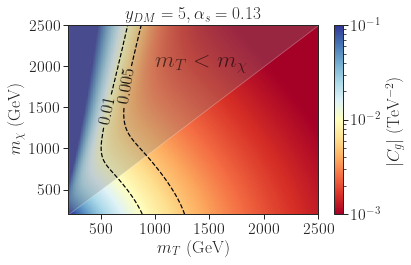

In [5]:
plt.figure(figsize=(6,4))
x = mSTv
y = mChiv
z = (np.abs(pts[:,2]))*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{g}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.max(), facecolor='gray', alpha=0.3)
plt.text(1000.,2000.,r'$m_{T} < m_{\chi}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.savefig('Cg_values.png')
plt.show()

### Cq

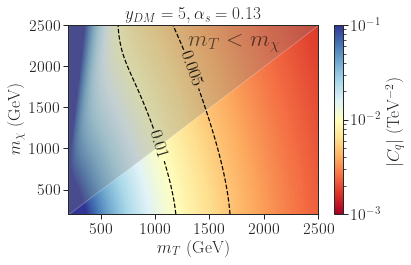

In [6]:
plt.figure(figsize=(6,4))
x = mSTv
y = mChiv
z = np.abs(pts[:,3])*1e6 # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',norm=LogNorm(vmin=1e-3,vmax=1e-1))
plt.colorbar(label=r'$|C_{q}|$ (TeV$^{-2}$)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, sorted([1e-2,5e-3]), colors='black',linestyles='dashed')
# plt.axline((500.,500.),slope=1.0,color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.max(), facecolor='gray', alpha=0.3)
plt.text(1300.,2250.,r'$m_{T} < m_{\chi}$',fontsize=23,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.0g')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.savefig('Cq_values.png')
plt.show()

### Cq/Cg

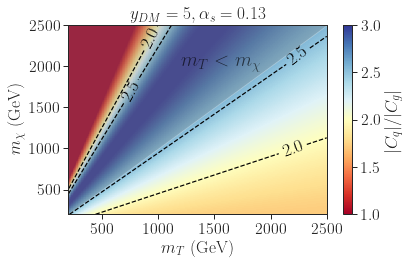

In [7]:
plt.figure(figsize=(6,4))
x = mSTv
y = mChiv
z = np.abs(pts[:,3]/(pts[:,2])) # Convert to TeV
znew = np.reshape(z,(len(x),len(y)))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=1.0,vmax=3)
plt.colorbar(label=r'$|C_{q}|/|C_{g}|$')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
# plt.title(r'$ g g \to \bar{t} t$',fontsize=20)

contours = plt.contour(x, y, znew.T, [2.0,2.5], colors='black',linestyles='dashed')
# plt.axline((500.,500.),(2000.,2000.),color='gray',linestyle='dashed',linewidth=2.0)
plt.fill_between(x, x, y.max(), facecolor='gray', alpha=0.3)
plt.text(1200.,2000.,r'$m_{T} < m_{\chi}$',fontsize=20,c='black',alpha=0.6)
plt.clabel(contours, inline=True, fontsize=18,fmt='%1.1f')
plt.xlim(200,2500)
plt.title(r'$y_{DM} = %1.0f, \alpha_s = %1.2f$' %(yDM,gs**2/(4*np.pi)))
plt.tight_layout()
plt.savefig('CgvsCq_values.png')
plt.show()